In [1]:
import pandas as pd
import numpy as np
import emoji
from datetime import date
from dateutil.relativedelta import relativedelta as rd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('MXvideos.csv',error_bad_lines=False,encoding='iso-8859-1')

In [3]:
df = df[['publish_time','views','likes','dislikes','comment_count','description']]

In [4]:
df['antig']= (date.today()-pd.to_datetime(df['publish_time'].map(lambda x:x[:10])).dt.date)/np.timedelta64(1,'Y')

In [5]:
df['ratio'] =df['likes']/(df['likes']+df['dislikes'])

In [6]:
df.drop(['publish_time','likes','dislikes'],axis=1,inplace=True)

In [7]:
varc = [v for v in df.columns if v!='description']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8cf792b38>,
      dtype=object)

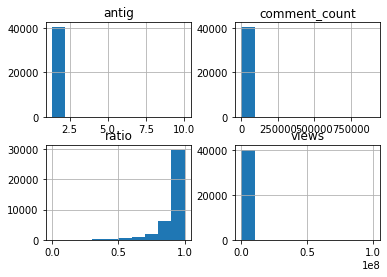

In [8]:
df[varc].hist()

In [9]:
df[varc].describe(percentiles=np.arange(0,1,0.01))

,views,comment_count,antig,ratio
count,4.045100e+04,40451.000000,40451.000000,39815.000000
mean,3.423820e+05,2039.660008,1.663781,0.918961
std,1.714691e+06,13938.031797,0.205521,0.105900
min,1.570000e+02,0.000000,1.363478,0.000000
0%,1.570000e+02,0.000000,1.363478,0.000000
1%,2.202000e+03,0.000000,1.371691,0.467604
2%,2.872000e+03,0.000000,1.377167,0.579900
3%,3.415500e+03,1.000000,1.382643,0.638217
4%,3.895000e+03,2.000000,1.388119,0.678292
5%,4.422000e+03,3.000000,1.396333,0.709182


In [10]:
len(df)

40451

In [11]:
df.dropna(inplace=True)

In [12]:
len(df)

35818

In [13]:
df.reset_index(drop=True,inplace=True)

In [14]:
X = df[varc].copy()

In [15]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [16]:
sc = StandardScaler()
sc.fit(X)
Xs = pd.DataFrame(sc.transform(X),columns=varc)

In [17]:
sc = MinMaxScaler()
sc.fit(X)
Xm= pd.DataFrame(sc.transform(X),columns=varc)

In [18]:
pca = PCA(n_components=3)
pca.fit(Xs)
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2','p3'])

In [19]:
print(pca.explained_variance_ratio_.cumsum())

[0.42368884 0.67637655 0.92344559]


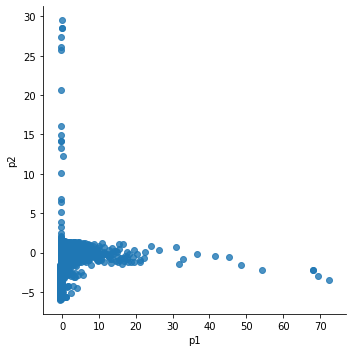

In [20]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

In [21]:
lst = []
for k in range(2,11):
    cl = KMeans(n_clusters=k)
    cl.fit(Xm)
    lst.append(cl.inertia_)

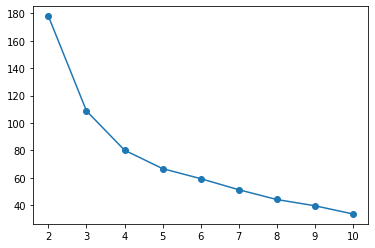

In [22]:
plt.plot(range(2,11),lst,marker='o')

In [23]:
cl = KMeans(n_clusters=5)
cl.fit(Xm)
Xp['cl']= df['cl'] = cl.predict(Xm)

In [24]:
df.cl.value_counts(True)

4    0.625775
0    0.223016
3    0.098442
1    0.040790
2    0.011977
Name: cl, dtype: float64

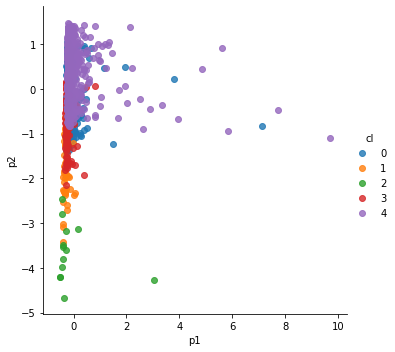

In [25]:
sns.lmplot(data=Xp.sample(1000),x='p1',y='p2',fit_reg=False,hue='cl')

In [26]:
df.groupby('cl').mean()

,views,comment_count,antig,ratio
cl,,,,
0,310450.123435,1225.407737,1.656007,0.904524
1,473449.725530,2651.733744,1.665676,0.642431
2,219399.074592,813.272727,1.664060,0.360901
3,259510.920306,887.393931,1.653866,0.802214
4,398856.935799,2842.509280,1.667583,0.974860


In [29]:
df[varc].mean().to_frame().T

,views,comment_count,antig,ratio
0,366316.452677,2257.317215,1.663531,0.921265


In [33]:
pd.set_option('display.max_colwidth',-1)

In [52]:
df.loc[df.cl==4].sample(5)

,views,comment_count,description,antig,ratio,cl
28765,9148,6,Mi pareja puede con Facundo - Lunes a Jueves 7:30 pm por Azteca 7 y http://www.azteca7.com/miparejapuede,1.478470,0.948718,4
18184,134023,1257,TUCA no quiere que se repita la VIOLENCIA en VERACRUZ. CHICHARITO pudo jugar en RUSIA y en otro equipo INGLÃS. GIOVANI anotÃ³ su primer gol del aÃ±o.\n\nESTO Y MÃS EN CRACKS MX! \n\nâº Twitter RubÃ©n Ortega: https://twitter.com/Ruben_Ortega18\nâº Twitter Cracks Mx: https://twitter.com/mx_cracks\nâº Twitter Charly MunguÃ­a: https://twitter.com/CharlyMunguia\nâº Twitter IraÃ­s Moreno: https://twitter.com/iraismore\nâº Facebook: https://www.facebook.com/mx.cracks/\nâº Instagram: https://www.instagram.com/mx_cracks/\nâº Instagram RubÃ©n: https://www.instagram.com/ruben_cracks/\nâº Instagram IraÃ­s: https://www.instagram.com/iraismmore/\nâº Instagram Charly: https://www.instagram.com/charlymunguia/\nâº Suscribete al canal de Charly: https://www.youtube.com/user/CharlyMunguia\n\nhttp://www.cracks.mx,1.656434,0.981573,4
27833,11366,274,"Mis chuladas aquÃ­ les dejo 3 ideas muy sencillas y rÃ¡pidas para hacer tarjetas lindas a MamÃ¡, #DiaDeLasMadres\n\nMÃ¡s ideas para MamÃ¡ da clickðð» https://bit.ly/2HCKBQW\n\nSÃ­gueme en nuestras redes sociales\nâ â© https://www.facebook.com/Chuladascreativas\nâ â© https://www.chuladascreativas.com\nâ â© https://www.instagram.com/sammilychuladas\nâ â©Twitter: @ChuladasSammily\nâ â© Mi otro Canal de Vlogs: http://bit.ly/2Fm1KAf\n\nPurse Organizer, Purse Switch",1.489421,0.986633,4
2337,19083,33,Mis redes sociales:\nSigue a Cine Hd:\nFacebook:https://www.facebook.com/cinehdchevere/\nInstagram:https://www.instagram.com/cine_hd/\nkik:itsCineHd,1.911059,0.947712,4
23872,13152,201,"Joel TRISTE no saben su apellido ð­ðÂ¡NO OLVIDES SUSCRIBIRTE!\nLa entrevista de CleverTv estuvo buenisimo vayan a verlo\nInstagram:https: https://www.instagram.com/xlitzi/\nMusically: primalolita\nTwitter: https://twitter.com/Litzizzle16?lang=es\n\nð§BUSINESS/NEGOCIOS: LitziNegocios@gmail.com\n\n\n\n-\n\n\n\n\n\n\n\n\n\n\n\n\nEn este video puedes sobre: CNCO, videos de CNCO, joel pimentel, cncowners, mas alla tour, christopher velez, erick brian colon, reggaeton lento cnco, hey dj cnco, zabdiel, ItsLitzi, Video Star, trucos, hacks, lifehacks, life hacks, tips faciles, tips rapidos, hacks faciles, hacks rapidos, life hacks faciles, life hacks rapidos,\ncosas que, cosas que no sabes, no sabes para que sirve, para que sirve, para que sirven, cosas que no sabes para que sirven, cosas que no sabias, no sabias para que sirve, no sabias para que sirven, cosas que no sabias para que sirven, life hacks para la vida, cosas que estas haciendo mal, cosas que haces mal, cosas que has hecho mal toda tu vida, cosas que haces mal y no lo sabes, cosas que hacemos mal sin saberlo, cosas que estabas haciendo mal, cosas que hacemos mal todos los dÃ­as, cosas que estabas haciendo mal todos los dÃ­as, comedia, risa, gracioso, video de comedia, video de risa, video gracioso, estabas usando mal, usabas mal, has usado mal, has estado usando mal, sorteo, sorteo internacional, sorteo de iphone, iphone 7, iphone, macbook, macbook pro, sorteo macbook pro, laptop, sorteo laptop, te regalo un iphone, te regalo una laptop, expectativa vs realidad, expectativas vs realidad, expec vs realidad, la primera vez",1.571559,0.984962,4
